In [64]:
import pandas as pd

In [65]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [66]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [67]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    #df=df.dropna()
    print('Sharpe: ',(252**0.5)*df['daily_return'].mean()/ df['daily_return'].std())
    return df

In [68]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date', drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

In [69]:
def get_account_value(model_name):
    df_account_value=pd.DataFrame()
    for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
        temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format(model_name,i))
        df_account_value = df_account_value.append(temp,ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
    print(sharpe)
    df_account_value=df_account_value.join(df_trade_date[63:].reset_index(drop=True))
    return df_account_value

## DJIA

In [83]:
dji = pd.read_csv("data/VN30Index_FORMATTED_R.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2021-12-01')]
test_dji = test_dji.reset_index(drop=True)
print(test_dji)

            Date     Open     High      Low    Close  Adj Close     Volume
0       2016-1-4   593.31   594.68   587.94   589.91     589.91   34560000
1       2016-1-5   586.93   589.65   583.06   583.62     583.62   38370000
2       2016-1-6   582.81   589.97   582.81   589.97     589.97   34670000
3       2016-1-7   589.12   589.12   577.19   582.30     582.30   53140000
4       2016-1-8   578.97   579.97   571.96   575.96     575.96   49590000
...          ...      ...      ...      ...      ...        ...        ...
1410  2021-11-24  1534.87  1567.77  1530.61  1565.29    1565.29  371790000
1411  2021-11-25  1573.29  1579.56  1567.67  1572.46    1572.46  255690000
1412  2021-11-26  1576.52  1587.00  1564.39  1566.55    1566.55  286510000
1413  2021-11-29  1541.22  1558.86  1541.22  1553.04    1553.04  270840000
1414  2021-11-30  1567.44  1568.09  1531.82  1537.59    1537.59  254250000

[1415 rows x 7 columns]


In [71]:
test_dji.shape

(1415, 7)

In [72]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-1-4,593.31,594.68,587.94,589.91,589.91,34560000
1,2016-1-5,586.93,589.65,583.06,583.62,583.62,38370000
2,2016-1-6,582.81,589.97,582.81,589.97,589.97,34670000
3,2016-1-7,589.12,589.12,577.19,582.30,582.30,53140000
4,2016-1-8,578.97,579.97,571.96,575.96,575.96,49590000


In [82]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [74]:
dow_strat = backtest_strat(test_dji)

## Ensemble Strategy

In [75]:
df=pd.read_csv('data/VN30_FORMATTED.csv')

In [76]:
rebalance_window = 63
validation_window = 63
unique_trade_date = df[(df.datadate > 20181001)&(df.datadate <= 20211201)].datadate.unique()
# print(unique_trade_date)

In [77]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [80]:
ensemble_account_value = get_account_value('ensemble')

FileNotFoundError: [Errno 2] File results/account_value_trade_ensemble_126.csv does not exist: 'results/account_value_trade_ensemble_126.csv'

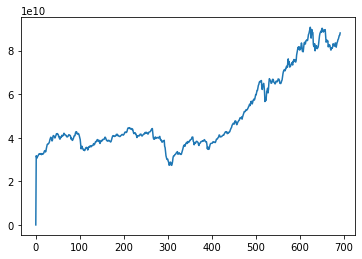

In [79]:
ensemble_account_value.account_value.plot()

In [ ]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  0.6034792698255954


In [ ]:
ensemble_account_value['Date'] = test_dji['Date']

In [ ]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1.000000e+06,20181228,NaN,2016-1-4
1,3.173112e+10,20190102,31730.120367,2016-1-5
2,3.088616e+10,20190103,-0.026629,2016-1-6
3,3.070006e+10,20190104,-0.006025,2016-1-7
4,3.147493e+10,20190107,0.025240,2016-1-8


In [ ]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [ ]:
# ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'results/df_account_value_ensemble_daily_return.csv'

/home/congvu/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/venv/lib/python3.7/site-packages/empyrical/stats.py:1296: RuntimeWarning: overflow encountered in power
  out=out


Start date,2016-01-04
End date,2018-10-10
Total months,33
,Backtest
Annual return,6182.6%
Cumulative returns,8807832.8%
Annual volatility,1914780.2%
Sharpe ratio,0.60
Calmar ratio,159.53
Stability,0.67
Max drawdown,-38.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.75,2016-11-09,2017-03-31,2017-10-13,243
1,20.10,2016-05-20,2016-06-17,2016-11-02,119
2,14.54,2018-01-18,2018-01-31,2018-02-21,25
3,11.91,2018-07-05,2018-07-20,NaT,NaN
4,7.83,2016-04-08,2016-05-10,2016-05-19,30


/home/congvu/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/venv/lib/python3.7/site-packages/pyfolio/tears.py:926: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


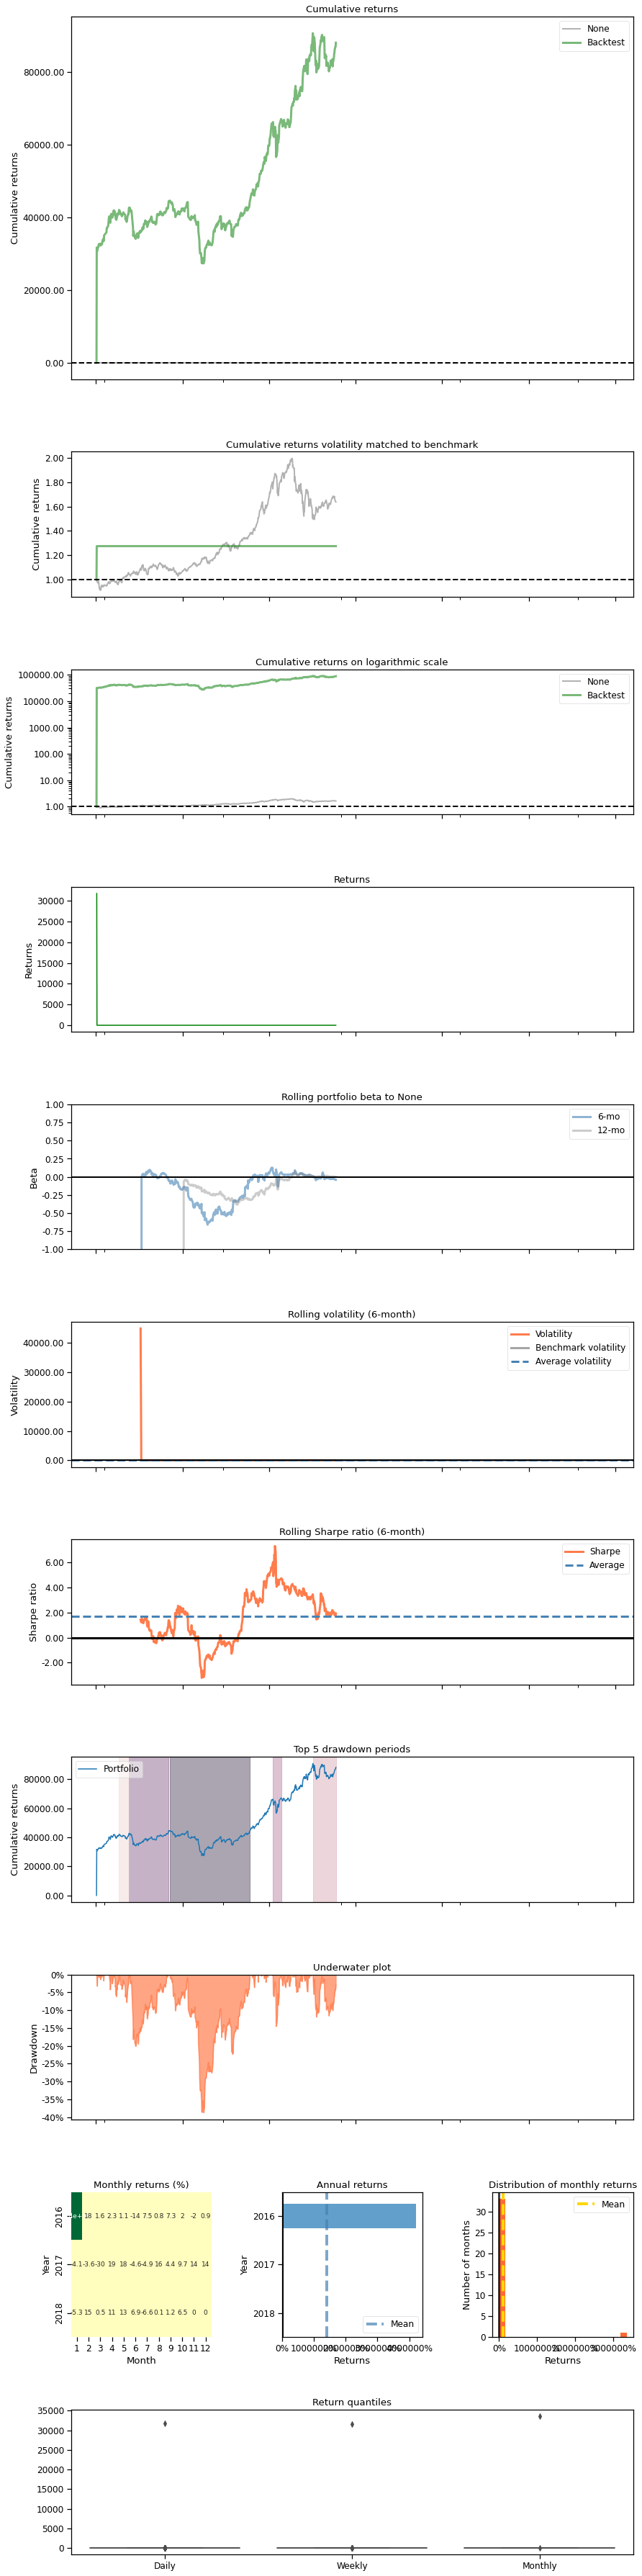

In [81]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)